In [55]:
import pandas as pd
from matplotlib import rcParams
rcParams['figure.figsize'] = [3, 2]
rcParams['figure.dpi'] = 120

from scipy import stats
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [181]:
df = pd.read_excel('Dataset EV2_coordination_z-scores.xlsx', sheet_name='table')


KCl genes
pval 1.0079771602449529e-11


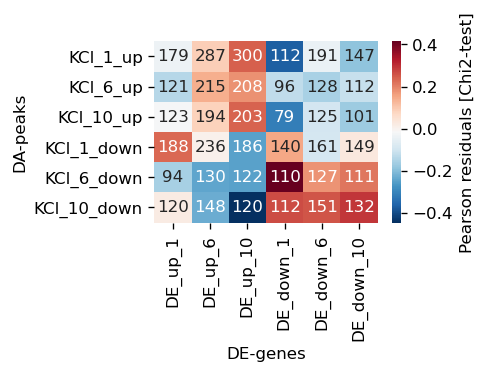

bdnf genes
pval 9.824384378585724e-05


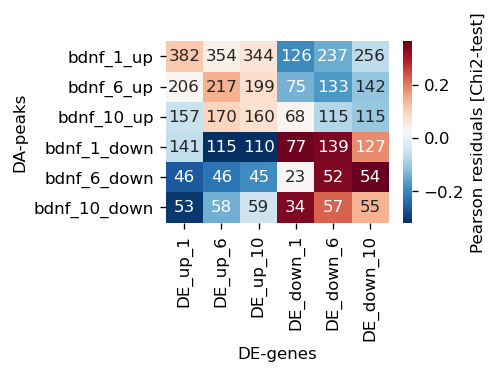

KCl peaks
pval 4.586071705046602e-12


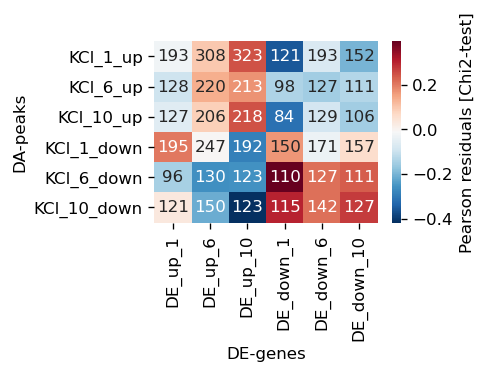

bdnf peaks
pval 1.1732676186566966e-11


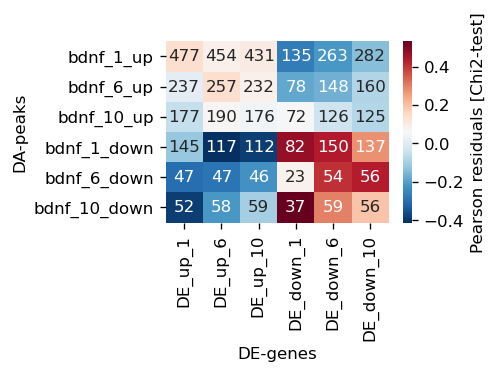

In [182]:
for col, featname in zip(['n.a', 'n.b'], ['genes', 'peaks']):
    fisher = []
    chi2 = []
    df2 = []
    for treatment in 'KCl', 'bdnf':
        print(treatment, featname)
        hm = df[df['DA-peaks'].str.contains(treatment)].pivot('DA-peaks', 'DE-genes', col)
        res = scipy.stats.chi2_contingency(hm)
        print('pval', res[1])
        ex = res[3]
        order_cols = ['DE_up_1', 'DE_up_6', 'DE_up_10', 'DE_down_1', 'DE_down_6', 'DE_down_10'] 
        order_rows = [k % treatment for k in ['%s_1_up', '%s_6_up', '%s_10_up', '%s_1_down', '%s_6_down', '%s_10_down']]
        log2 = np.log2(hm / pd.DataFrame(ex, columns=hm.columns,  index=hm.index)).reindex(order_rows)

        chi2.append(log2.reset_index().melt('DA-peaks'))
        sns.heatmap(log2[order_cols], cmap='RdBu_r', cbar_kws={'label': 'Pearson residuals [Chi2-test]'},
                    annot=hm[order_cols].reindex(order_rows), fmt='')
        plt.show()

        for k1 in hm.index:
            for k2 in hm.columns:        
                a = hm.loc[k1, k2]
                b = sum(hm.loc[k1]) - a
                c = sum(hm.T.loc[k2]) - a
                d = np.sum(hm.sum()) - a - b - c
                # print(k1, k2, a, b, c, d)
                df2.append([k1, k2, a, b, c, d] + list(fisher_exact([[a, b], [c, d]], alternative='greater')))

    df2 = pd.DataFrame(df2, columns=['k1', 'k2', 'a', 'b', 'c', 'd', 'odds.ratio', 'pval'])
    df2 = df2.sort_values('pval')
    df2['padj'] = RFacade.get_bh_pvalues(df2['pval']) #  statsmodels.stats.multitest.fdrcorrection(fisher['pval'], alpha=0.1, method='indep', is_sorted=False)
    fisher.append(df2)
    fisher = pd.concat(fisher)
    chi2 = pd.concat(chi2)

    df['k'] = df['DA-peaks'] + ':' + df['DE-genes']
    fisher['k'] = fisher['k1'] + ':' + fisher['k2']
    chi2['k'] = chi2['DA-peaks'] + ':' + chi2['DE-genes']

    # fisher.sort_values('pval').head(20)
    df['odds.ratio.fisher.%s' % featname] = df['k'].map(fisher.set_index('k')['odds.ratio'].to_dict())
    df['padj.fisher.%s' % featname] = df['k'].map(fisher.set_index('k')['padj'].to_dict())
    df['pearson.res.%s' % featname] = df['k'].map(chi2.set_index('k')['value'].to_dict())


In [184]:
df.sort_values('padj.fisher.genes', ascending=True)

DA-peaks    DE-genes                       k  n.a        mu.a    sigma.a              perm.mode.a  z.score.a  Z>2.5.a feat.a    distance.a  n.b        mu.b    sigma.b              perm.mode.b  z.score.b  Z>2.5.b feat.b    distance.b  both.Z.greater.2  odds.ratio.fisher.genes  padj.fisher.genes  pearson.res.genes  odds.ratio.fisher.peaks  padj.fisher.peaks  pearson.res.peaks
4      KCl_1_up    DE_up_10       KCl_1_up:DE_up_10  300   88.928571  75.590026  sig.only.keep.hierarchy   2.792319     True  genes   KCl_0_50000  323   94.964286  80.469374  sig.only.keep.hierarchy   2.833820     True  peaks   KCl_0_50000              True                 1.328391           0.010899           0.241496                 1.339550           0.002252           0.245569
1   bdnf_1_down   DE_down_6   bdnf_1_down:DE_down_6  139   88.964286  14.445667  sig.only.keep.hierarchy   3.463718     True  genes  bdnf_0_50000  150   93.678571  15.478219  sig.only.keep.hierarchy   3.638754     True  peaks  bdnf_0_50000              True                 1.413893           0.016935           0.344430                 1.542613           0.001273           0.434954
7    KCl_6_down   DE_down_1    KCl_6_down:DE_down_1  110   73.964286  13.097116  sig.only.keep.hierarchy   2.751424     True  genes   KCl_0_50000  110   74.821429  13.290850  sig.only.keep.hierarchy   2.646826     True  peaks   KCl_0_50000              True                 1.476447           0.016935           0.414650                 1.444712           0.016014           0.393706
6     KCl_10_up    DE_up_10      KCl_10_up:DE_up_10  203   52.392857  59.565294  sig.only.keep.hierarchy   2.528438     True  genes   KCl_0_50000  218   54.214286  61.831775  sig.only.keep.hierarchy   2.648892     True  peaks   KCl_0_50000              True                 1.289078           0.048792           0.237690                 1.304468           0.016014           0.246646
24  KCl_10_down  DE_down_10  KCl_10_down:DE_down_10  132   45.321429  47.272805  sig.only.keep.hierarchy   1.833582    False  genes   KCl_0_50000  127   45.178571  47.203249  sig.only.keep.hierarchy   1.733386    False  peaks   KCl_0_50000             False                 1.326148           0.061107           0.291093                 1.295153           0.068970           0.270132
..          ...         ...                     ...  ...         ...        ...                      ...        ...      ...    ...           ...  ...         ...        ...                      ...        ...      ...    ...           ...               ...                      ...                ...                ...                      ...                ...                ...
45  KCl_10_down     DE_up_6     KCl_10_down:DE_up_6  148   97.321429  41.528006  sig.only.keep.hierarchy   1.220347    False  genes   KCl_0_50000  150   96.678571  41.752719  sig.only.keep.hierarchy   1.277077    False  peaks   KCl_0_50000             False                 0.792924           0.999991          -0.230050                 0.807286           0.999976          -0.212658
46  bdnf_6_down    DE_up_10    bdnf_6_down:DE_up_10   45   19.821429  20.551423  sig.only.keep.hierarchy   1.225150    False  genes  bdnf_0_50000   46   20.178571  20.954123  sig.only.keep.hierarchy   1.232284    False  peaks  bdnf_0_50000             False                 0.842734           0.999991          -0.191407                 0.817394           0.999976          -0.226380
47    bdnf_6_up   DE_down_6     bdnf_6_up:DE_down_6  133   56.714286  60.880361  sig.only.keep.hierarchy   1.253043    False  genes  bdnf_0_50000  148   62.571429  69.459869  sig.only.keep.hierarchy   1.229898    False  peaks  bdnf_0_50000             False                 0.838846           0.999991          -0.174399                 0.846047           0.999976          -0.166134
38   bdnf_10_up  DE_down_10   bdnf_10_up:DE_down_10  115   39.392857  52.397750  sig.only.keep.hierarchy   1.442946    False  genes  bdnf_0_50000  125   42.642857  57.

In [185]:
df.to_csv('Dataset EV2_coordination_z-scores_updated.tsv', sep='\t', index=0)